# This file aims to illustrate the comparison of the measured channel property and the simulated channel property extracted from the three layer hierarchical Markov model. $M=N=128$

![](Channel_property.assets\Snipaste_2021-12-06_09-49-15.png)

M. K. Samimi and T. S. Rappaport, "3-D Millimeter-Wave Statistical Channel Model for 5G Wireless System Design," in IEEE Transactions on Microwave Theory and Techniques, vol. 64, no. 7, pp. 2207-2225, July 2016, doi: 10.1109/TMTT.2016.2574851.

## What is `lobes`
Lobes is '`spatial lobes (SLs)`' corresponse to '`Time Clusters (TCs)`'
|  SLs   | TCs  |
|  ----  | ----  |
| ![SLs](Channel_property.assets\SpatialLobes.png)  | ![TCs](Channel_property.assets\TimeClusters.png) |





## what is $\mu_M,\ \mu_S, \sigma_M, \sigma_S$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

0.16493699385564012


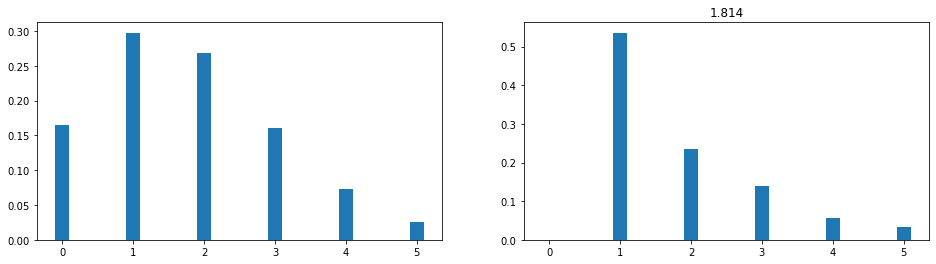

In [37]:
np.random.seed(0)
# measured = np.random.poisson(1.8, size=64)
x = np.array([0, 1,2,3,4,5])
measured_sampl = poisson.rvs(1.6, size = 1000)
for i, m in enumerate(measured_sampl):
    if m == 0:
        measured_sampl[i] = 1
    if m > 5:
        measured_sampl[i] = 5


# print(measured_sampl)
measured = poisson.pmf(x, 1.8)

plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.bar(x, measured , width=0.2)
plt.subplot(1,2,2)
data_measured, bins, patches = plt.hist(measured_sampl, rwidth=0.2, density= True, bins = np.array([0, 1,2,3,4,5,6])-0.5)
plt.title(str(measured_sampl.mean()))
print(measured.mean())


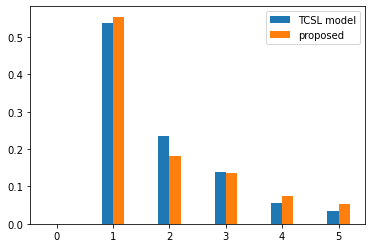

In [42]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.special import gamma as gamma_function
from scipy.special import digamma
alpha_0, alpha_1 = 1, 1
beta_0, beta_1 = 0.001, 1
K=4
p01 = 0.5
p10 = 0.5
trans_pro_C = {
    'p01':p01,
    'p10':p10,
    'p1':p01/(p01+p10)
    }
M = 64
tau = 8
L = 4

## generate channel support
def count_lobes_return_array(p01 = 0.5, p10 = 0.5, M = 64):
    count_list = np.array([0 for i in range(6)])
    # 6 is a nice value
    def count_lobes(seed = 2, p01 = 0.5, p10 = 0.5, M = 64):
        np.random.seed(seed)   
        def common_channel_support(p01 = 0.1, p10=0.3, M= 64):
            p0 = p10/(p10+p01)
            p1 = 1-p0

            # generate Markov chain
            tmp_support = np.array([0.0 for m in range(M)])
            if np.random.uniform(0,1,1)[0] < p0:
                tmp_support[0] = 0
            for i in range(M - 1):
                if tmp_support[i] == 0:
                    if np.random.uniform(0,1,2)[0] < p01:
                        tmp_support[i+1] = 1
                    else:
                        tmp_support[i+1] = 0
                else:
                    if np.random.uniform(0,1,2)[1] < p10:
                        tmp_support[i+1] = 0
                    else:
                        tmp_support[i+1] = 1
            return tmp_support

        common_support_varphi = common_channel_support(p01, p10, M)

        marker_left = 0
        marker_rigth = 1
        state_store_deep_1 = ''
        state = '' # 'up_edge' | 'up_idle' | 'down_idle' | 'down_edge'
        while marker_rigth != M:
            state_store_deep_1 = state
            if common_support_varphi[marker_rigth] ==1 and common_support_varphi[marker_rigth -1] ==0:
                state = 'up_edge'
                marker_left = marker_rigth - 1
            
            elif common_support_varphi[marker_rigth] ==0 and common_support_varphi[marker_rigth -1] ==1:
                state = 'down_edge'
            elif common_support_varphi[marker_rigth] ==1 and common_support_varphi[marker_rigth -1] ==1:
                state = state_store_deep_1
            elif common_support_varphi[marker_rigth] ==0 and common_support_varphi[marker_rigth -1] ==0:
                state = state_store_deep_1
            if state_store_deep_1 == 'up_edge' and state == 'down_edge':
                # print(marker_rigth, marker_rigth - marker_left -1 )
                wdith = marker_rigth - marker_left -1
                if wdith > 5:
                    count_list[5] += 0
                else:
                    count_list[wdith] += 1

            marker_rigth +=1

    for seed in range(10):
        count_lobes(
            seed = seed,
            p10 = p10,
            p01 = p01,
            M = 64
            )
    return np.array(count_list/count_list.sum())

data_sim = count_lobes_return_array(
    p01= 0.5,
    p10 = 0.5, 
    M= 64
)

data_measured = np.array(data_measured)
plt.bar(np.array(range(6))-0.1, data_measured, width= 0.2)
plt.bar(np.array(range(6))+0.1, data_sim, width= 0.2)
plt.legend(['TCSL model', 'proposed'])
# plt.scatter(range(M), common_support_varphi)
# plt.plot(range(M), common_support_varphi)
# plt.legend(['common_support_varphi'])

# data_sim = np.array(count_list/count_list.sum())